In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
data = pd.read_csv('../gun_violence_dataset/people_dataset.csv', index_col=0)

data = data[data.Gender != 'Male, female']

data.head()

,Age,Age_group,Gender,Incident_id,State,City_or_county,N_killed,N_injured,Average_age,N_victims,N_suspects,Stolen_gun_involved,Minors_involved,Subject-Suspect,Victim,Arrested,Injured,Killed,Unharmed
0,20.0,Adult 18+,Male,461105,Pennsylvania,Mckeesport,0,4,20.0,4.0,1.0,Unknown,False,0,1,1,0,0,0
5,20.0,Adult 18+,Male,460726,California,Hawthorne,1,3,20.0,4.0,1.0,Unknown,False,0,1,0,0,1,0
10,25.0,Adult 18+,Male,478855,Ohio,Lorain,1,3,31.2,3.0,2.0,Unknown,False,1,0,1,1,0,1
11,31.0,Adult 18+,Male,478855,Ohio,Lorain,1,3,31.2,3.0,2.0,Unknown,False,1,0,1,0,0,1
12,33.0,Adult 18+,Male,478855,Ohio,Lorain,1,3,31.2,3.0,2.0,Unknown,False,0,1,0,0,1,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217670 entries, 0 to 392322
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  217670 non-null  float64
 1   Age_group            217670 non-null  object 
 2   Gender               217670 non-null  object 
 3   Incident_id          217670 non-null  int64  
 4   State                217670 non-null  object 
 5   City_or_county       217670 non-null  object 
 6   N_killed             217670 non-null  int64  
 7   N_injured            217670 non-null  int64  
 8   Average_age          217670 non-null  float64
 9   N_victims            217670 non-null  float64
 10  N_suspects           217670 non-null  float64
 11  Stolen_gun_involved  217670 non-null  object 
 12  Minors_involved      217670 non-null  bool   
 13  Subject-Suspect      217670 non-null  int64  
 14  Victim               217670 non-null  int64  
 15  Arrested         

In [20]:
data.describe()

,Age,Incident_id,N_killed,N_injured,Average_age,N_victims,N_suspects,Subject-Suspect,Victim,Arrested,Injured,Killed,Unharmed
count,217670.000000,2.176700e+05,217670.000000,217670.000000,217670.000000,217670.000000,217670.000000,217670.000000,217670.000000,217670.000000,217670.000000,217670.000000,217670.000000
mean,29.558350,5.657296e+05,0.474434,0.634906,29.548310,1.146943,1.305991,0.430119,0.569881,0.323862,0.314646,0.235958,0.413695
std,13.120013,2.886350e+05,1.180924,1.407682,11.928455,2.222595,1.774367,0.495094,0.495094,0.467949,0.464376,0.424597,0.492496
min,0.000000,9.211700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.234030e+05,0.000000,0.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.505125e+05,0.000000,0.000000,26.625000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,8.167395e+05,1.000000,1.000000,35.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,311.000000,1.083472e+06,50.000000,53.000000,209.000000,102.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation between people

<AxesSubplot:>

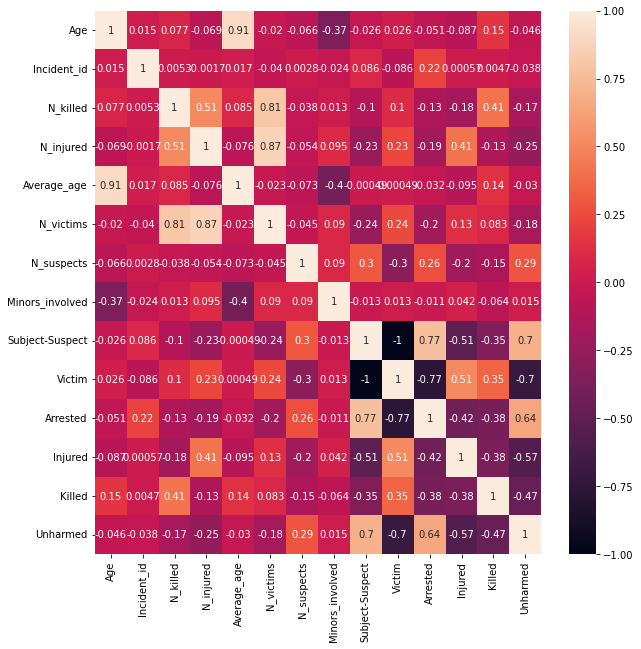

In [21]:
# Correlation matrix for numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

# We can see the high correlation between victims and subject-suspect, also victims tend not to be unharmed, as well as subject-suspects 
# seems to usually be unharmed and arrested

# Distributions

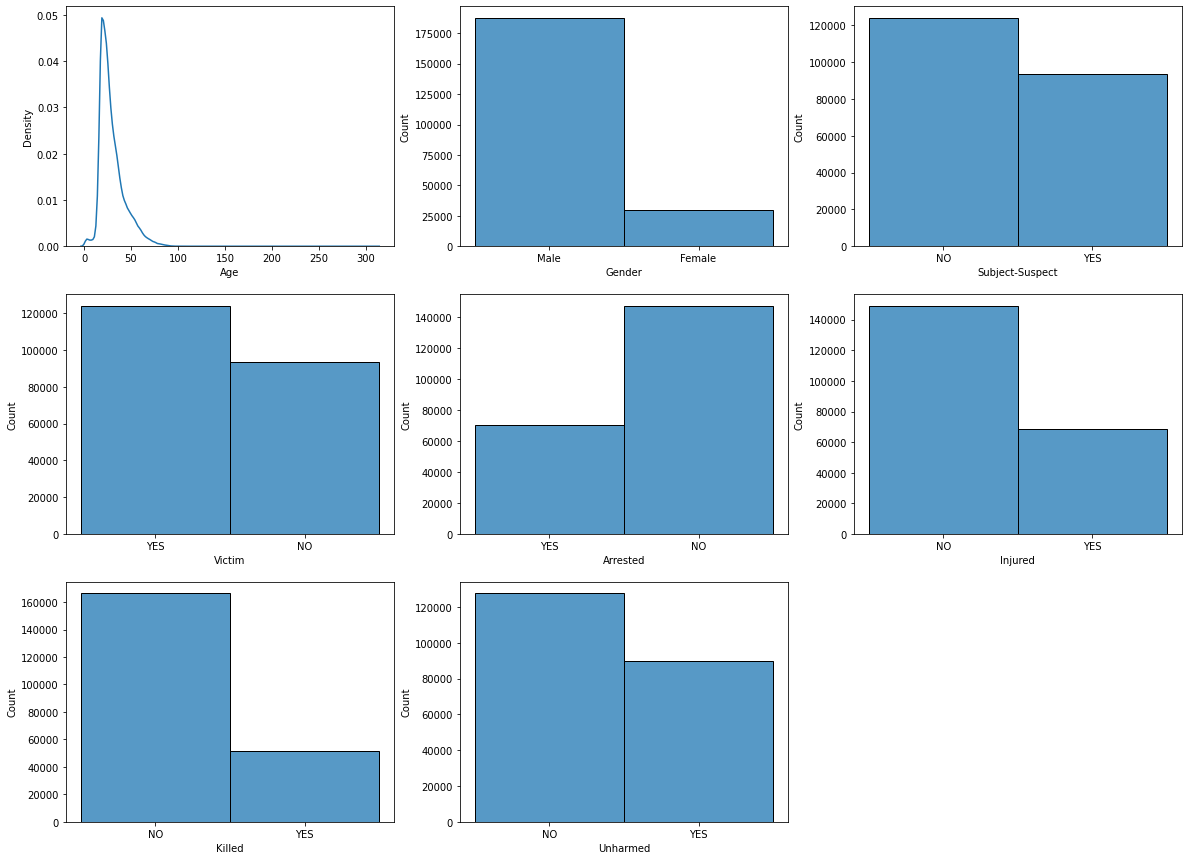

In [32]:
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(3, 3, 1)
sns.kdeplot(data.Age)

ax = fig.add_subplot(3, 3, 2)
sns.histplot(data.Gender)

ax = fig.add_subplot(3, 3, 3)
sns.histplot(data['Subject-Suspect'].map({0: 'NO', 1: 'YES'}))

ax = fig.add_subplot(3, 3, 4)
sns.histplot(data['Victim'].map({0: 'NO', 1: 'YES'}))

ax = fig.add_subplot(3, 3, 5)
sns.histplot(data['Arrested'].map({0: 'NO', 1: 'YES'}))

ax = fig.add_subplot(3, 3, 6)
sns.histplot(data['Injured'].map({0: 'NO', 1: 'YES'}))

ax = fig.add_subplot(3, 3, 7)
sns.histplot(data['Killed'].map({0: 'NO', 1: 'YES'}))

ax = fig.add_subplot(3, 3, 8)
sns.histplot(data['Unharmed'].map({0: 'NO', 1: 'YES'}))

plt.show()

# Multi-variable analysis

In [23]:
# We take the suspects and analyse the mean number of victims with respect to the age group of 
# the suspect and whether or not there where minor involved 
data[data['Subject-Suspect'] == 1].pivot_table('N_victims', 'Minors_involved', 'Age_group', 'mean')

# The next result suggests that the number of victims is higher when there are minors involved in all cases

Age_group,Adult 18+,Child 0-11,Teen 12-17
Minors_involved,,,
False,0.476535,NaN,NaN
True,1.117389,0.714286,0.613636


In [24]:
# We take the suspects and analyse the mean number of fatal victims with respect to the age group of 
# the suspect and whether or not there where minor involved 
data[data['Subject-Suspect'] == 1].pivot_table('N_killed', 'Minors_involved', 'Age_group', 'mean')

# The number of fatal victims is also higher when there are minors involved

Age_group,Adult 18+,Child 0-11,Teen 12-17
Minors_involved,,,
False,0.322991,NaN,NaN
True,0.501133,0.248571,0.289245


In [25]:
# We take the suspects and analyse the mean number of victims with respect to the age group of 
# the suspect and their sex 
data[data['Subject-Suspect'] == 1].pivot_table('N_victims', 'Gender', 'Age_group', 'mean')

# There does not seem to be any correlation

Age_group,Adult 18+,Child 0-11,Teen 12-17
Gender,,,
Female,0.492054,0.735294,0.609223
Male,0.533029,0.712025,0.613874
